In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import display,HTML
import plotly
import re

%matplotlib inline

In [ ]:
#load the fifa 2020 dataset
path="https://github.com/karandesai24/fifa20-player-analysis/raw/main/players_20.csv"
df = pd.read_csv(path)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
#checking how many rows and columns we have
df.shape

(18278, 104)

In [ ]:
#checking columns
col=list(df.columns)
col

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [ ]:
#Dropping some useless columns
useless_columns = ['sofifa_id', 'player_url',  'body_type', 'real_face', 'loaned_from' ]
df=df.drop(useless_columns,axis=1)

In [ ]:
df.head(5)

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,NaN,GK,13.0,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
#displaying columns for given list
df[['short_name','player_positions']]

,short_name,player_positions
0,L. Messi,"RW, CF, ST"
1,Cristiano Ronaldo,"ST, LW"
2,Neymar Jr,"LW, CAM"
3,J. Oblak,GK
4,E. Hazard,"LW, CF"
...,...,...
18273,Shao Shuai,CB
18274,Xiao Mingjie,CB
18275,Zhang Wei,CM
18276,Wang Haijian,CM


In [ ]:
#displaying player with min age by sorting in list
player_age = df[['short_name','age','club']]
player_age.sort_values(by=['age']).head()

,short_name,age,club
18171,J. Starbuck,16,Grimsby Town
4764,A. Hložek,16,Sparta Praha
18243,E. Sartorius,16,Lincoln City
17827,D. Burns,16,St. Patrick's Athletic
17614,D. Obbekjær,16,Odense Boldklub


In [ ]:
#displaying player with top-5 high wage players
player_salary = df[['short_name','wage_eur','club']]
player_salary.head(5)

,short_name,wage_eur,club
0,L. Messi,565000,FC Barcelona
1,Cristiano Ronaldo,405000,Juventus
2,Neymar Jr,290000,Paris Saint-Germain
3,J. Oblak,125000,Atlético Madrid
4,E. Hazard,470000,Real Madrid


In [ ]:
#Filling Missing Values by median
columns = ["dribbling", "defending", "physic", "passing", "shooting", "pace"]
df[columns]

,dribbling,defending,physic,passing,shooting,pace
0,96.0,39.0,66.0,92.0,92.0,87.0
1,89.0,35.0,78.0,82.0,93.0,90.0
2,95.0,32.0,58.0,87.0,85.0,91.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,94.0,35.0,66.0,86.0,83.0,91.0
...,...,...,...,...,...,...
18273,33.0,47.0,51.0,28.0,23.0,57.0
18274,35.0,48.0,48.0,33.0,24.0,58.0
18275,45.0,48.0,51.0,44.0,35.0,54.0
18276,47.0,45.0,52.0,47.0,35.0,59.0


In [ ]:
#how many NaN values are there in these columuns
df[columns].isnull().sum()

dribbling    2036
defending    2036
physic       2036
passing      2036
shooting     2036
pace         2036
dtype: int64

In [ ]:
#filling the NaN values with the median of the respective column
for col in columns:
  df[col] = df[col].fillna(df[col].median())

In [ ]:
df[columns]

,dribbling,defending,physic,passing,shooting,pace
0,96.0,39.0,66.0,92.0,92.0,87.0
1,89.0,35.0,78.0,82.0,93.0,90.0
2,95.0,32.0,58.0,87.0,85.0,91.0
3,64.0,56.0,66.0,58.0,54.0,69.0
4,94.0,35.0,66.0,86.0,83.0,91.0
...,...,...,...,...,...,...
18273,33.0,47.0,51.0,28.0,23.0,57.0
18274,35.0,48.0,48.0,33.0,24.0,58.0
18275,45.0,48.0,51.0,44.0,35.0,54.0
18276,47.0,45.0,52.0,47.0,35.0,59.0


In [ ]:
#filling all NaN values in the dataframe with 0
df=df.fillna(0)
df.head(20)

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2004-07-01,2021.0,0,0.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,"Long Throw-in, Selfish, Argues with Officials,...",84,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,0,GK,13.0,2014-07-16,2023.0,GK,1.0,69.0,54.0,58.0,64.0,56.0,66.0,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,91,91,90000000,370000,"CAM, CM",Right,4,5,4,High/High,166500000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,2015-08-30,2023.0,RCM,7.0,76.0,86.0,92.0,86.0,61.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,...,76,61,88,94,79,91,68,58,51,15,13,5,10,13,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,143400000.0,0,GK,1.0,2014-07-01,2022.0,SUB,22.0,69.0,54.0,58.0,64.0,56.0,66.0,88

In [ ]:
#count the NaN values again
df.isnull().sum()

short_name    0
long_name     0
age           0
dob           0
height_cm     0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 99, dtype: int64

In [ ]:
#Scatter Plot (colored by Age) year 2020 - Overall Rating vs Value in Euros
fig=go.Figure(data=go.Scatter(x=df['overall'],y=df['value_eur'],mode='markers',marker=dict(size=10,color=df['age'],showscale=True),text=df['short_name']))
fig.update_layout(title='Scatter Plot- Overall Ratings vs Values in Euros',
xaxis_title='Overall Ratings',
yaxis_title='Values in Euros')
fig.show()

In [ ]:
#Pie chart proportion of right-foot players vs left-foot players
fig = px.pie(df, names='preferred_foot', title='Percentage of Players by Preferred Foot')
fig.show()

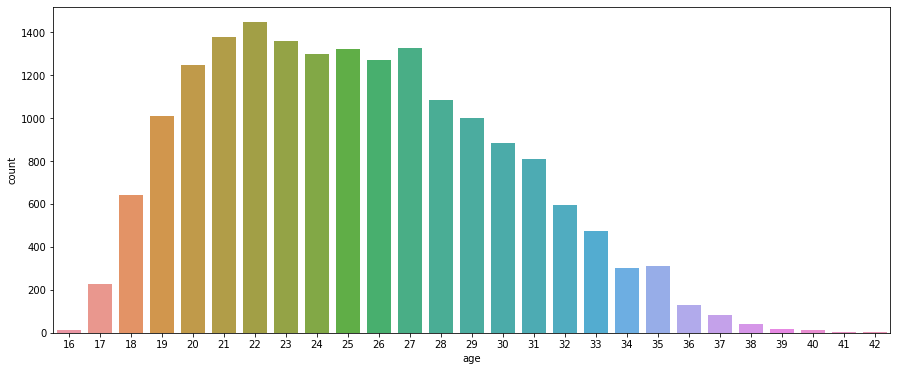

In [ ]:
#Histrogram of Player Age
plt.figure(figsize=(15,6))
sns.countplot(x="age",data=df)

In [ ]:
#Pie chart Describing the Percentage of Players in different Attacker positions
attack = ['RW', 'LW', 'ST', 'CF', 'LS', 'RS', 'RF', 'LF']
sample = df.query('team_position in @attack') 
fig = px.pie(sample, names ='team_position', color_discrete_sequence=px.colors.sequential.Magma_r,title='Percentage of Player in Attacking Positions')
fig.show()

In [ ]:
#Pie chart Describing the Percentage of Players in different Midfielder positions
mid = ['CAM', 'RCM', 'CDM', 'LDM', 'RM', 'LCM', 'LM', 'RDM', 'RAM','CM', 'LAM']
sample = df.query('team_position in @mid') 
fig = px.pie(sample, names ='team_position', color_discrete_sequence=px.colors.sequential.Magma_r,title='Percentage of Player in Midfielder Positions')
fig.show()

In [ ]:
#Pie chart Describing the Percentage of Players in different Defender positions
defence = ['LCB', 'RCB', 'LB', 'RB', 'CB', 'RWB', 'LWB']
sample = df.query('team_position in @defence')
fig = px.pie(sample, names ='team_position', color_discrete_sequence=px.colors.sequential.Magma_r,title='Percentage of Player in Defender Positions')
fig.show()

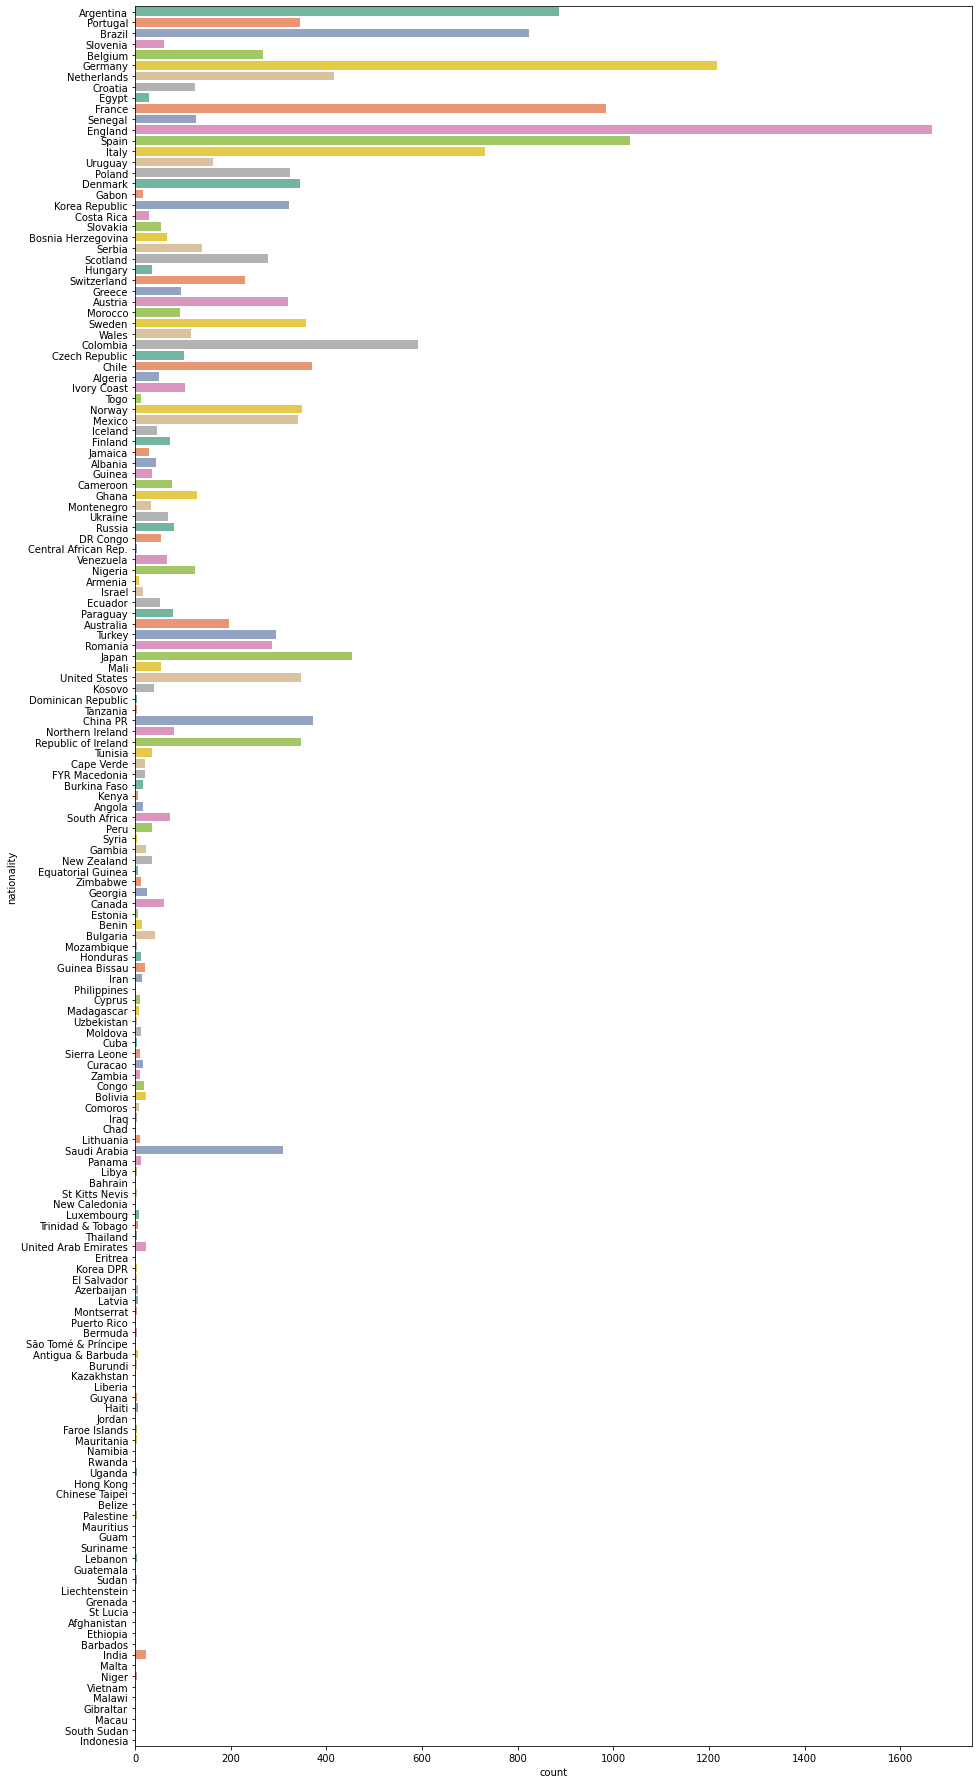

In [ ]:
#nationwise players count 
plt.figure(figsize=(15,32))
 
sns.countplot(y = df.nationality,palette="Set2") 


In [ ]:
#players comparison messi vs ronaldo
skills=['pace',
        'dribbling',
        'shooting',
        'passing',
        'physic',
        'attacking_short_passing',
        'attacking_finishing',
        'attacking_crossing',
        'attacking_volleys',
        'skill_dribbling',
        'skill_curve',
        'skill_fk_accuracy',
        'skill_long_passing',
        'skill_ball_control',
        'movement_acceleration',
        'movement_sprint_speed',
        'movement_agility',
        'movement_reactions',
        'movement_balance',
        'power_shot_power',
        'power_jumping',
        'power_stamina',
        'power_strength',
        'power_long_shots',
        'mentality_vision',
        'mentality_positioning',
        'mentality_composure',

]

In [ ]:
messi=df.loc[df['short_name']=='L. Messi']
messi=pd.DataFrame(messi,columns=skills)

ronaldo=df.loc[df['short_name']=='Cristiano Ronaldo']
ronaldo=pd.DataFrame(ronaldo,columns=skills)

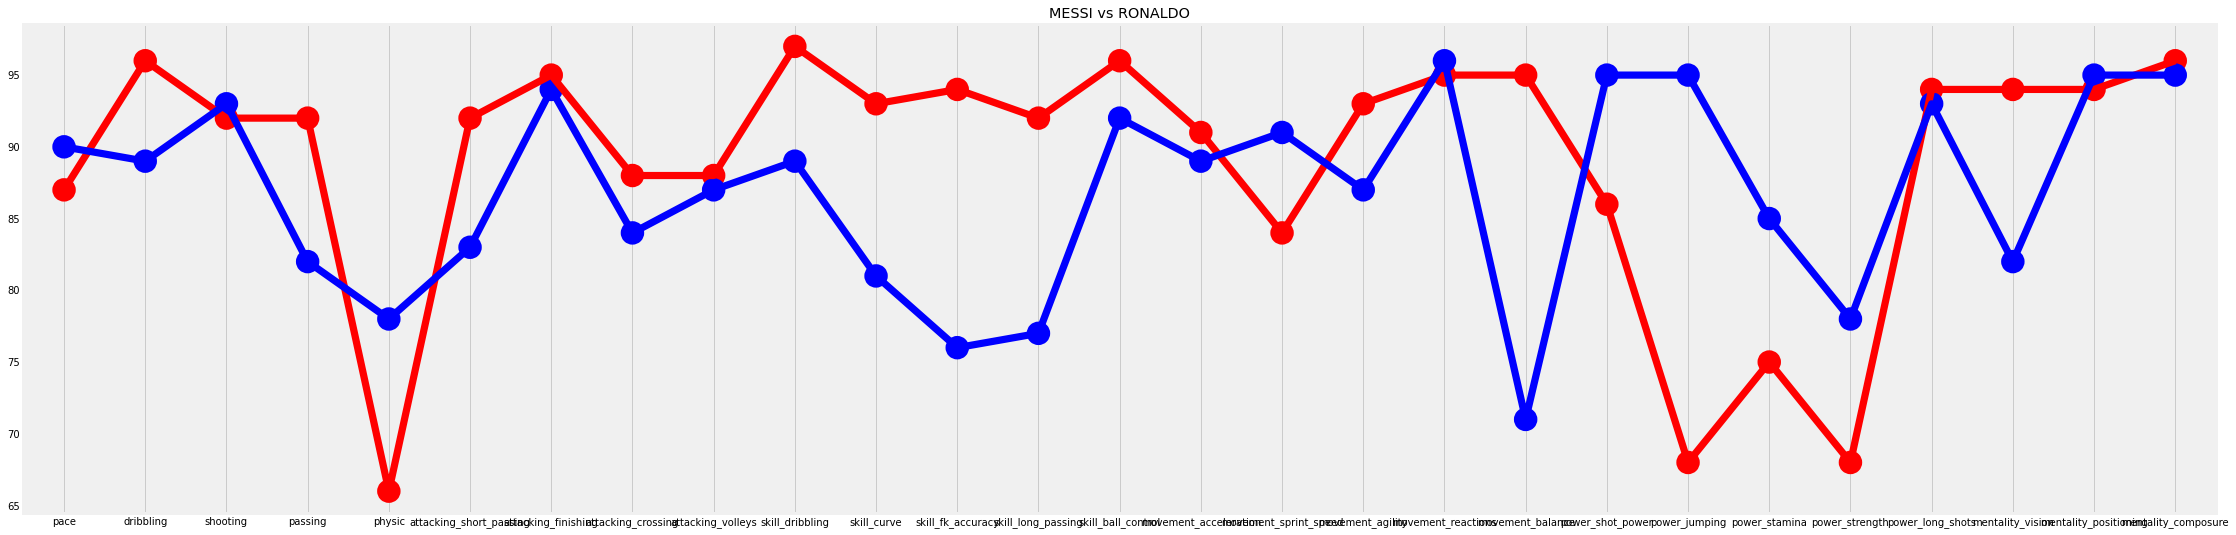

In [ ]:
plt.figure(figsize=(35,9))
sns.pointplot(data=messi,color='red')
sns.pointplot(data=ronaldo,color='blue')
plt.title("MESSI vs RONALDO")
plt.grid()


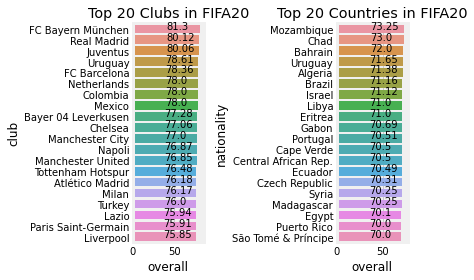

In [ ]:
#ploting chart of top 20 club & countries by overall player rating
plt.subplot(121)
top_clubs = df.groupby(['club']).overall.mean().sort_values(ascending  = False)[:20]
plt.title("Top 20 Clubs in FIFA20")
sns.barplot(y = top_clubs.index, x = top_clubs)
for index, value in enumerate(top_clubs):
    plt.text(value//2, index, str(round(value,2)))
    
plt.subplot(122)
top_countries = df.groupby(['nationality']).overall.mean().sort_values(ascending  = False)[:20]
plt.title("Top 20 Countries in FIFA20")
sns.barplot(y = top_countries.index, x = top_countries)
for index, value in enumerate(top_countries):
    plt.text(value//2, index, str(round(value,2)))
    
plt.tight_layout()

In [ ]:
#displaying players of club & country
def Club(x):
    return df[df['club'] == x ][
        ['short_name','age','club',"team_jersey_number","player_positions","overall","value_eur"]].sort_values(by=['overall'],ascending=False)

#Function to extract specific country players
def Country(x):
    return df[df['nationality'] == x ][['short_name','age','nationality',"player_positions",
                                            "overall","value_eur"]].sort_values(by=['overall'],ascending=False)

In [ ]:
#there are 33 players of FCB
print(Club("FC Barcelona"))

            short_name  age          club  ...  player_positions overall  value_eur
0             L. Messi   32  FC Barcelona  ...        RW, CF, ST      94   95500000
6        M. ter Stegen   27  FC Barcelona  ...                GK      90   67500000
19           L. Suárez   32  FC Barcelona  ...                ST      89   53000000
21     Sergio Busquets   30  FC Barcelona  ...           CDM, CM      89   55000000
22        A. Griezmann   28  FC Barcelona  ...        CF, ST, LW      89   69000000
29               Piqué   32  FC Barcelona  ...                CB      88   38000000
51          Jordi Alba   30  FC Barcelona  ...                LB      87   40000000
59           S. Umtiti   25  FC Barcelona  ...                CB      86   50000000
64          I. Rakitić   31  FC Barcelona  ...           CM, CDM      86   38000000
75          F. de Jong   22  FC Barcelona  ...           CM, CDM      85   52000000
84          C. Lenglet   24  FC Barcelona  ...                CB      85   4

In [ ]:
#886 players are from argentina
print(Country("Argentina"))

           short_name  age nationality player_positions  overall  value_eur
0            L. Messi   32   Argentina       RW, CF, ST       94   95500000
17          S. Agüero   31   Argentina               ST       89   60000000
23          P. Dybala   25   Argentina          CAM, RW       88   76500000
66        A. Di María   31   Argentina           RW, LW       86   39000000
93          M. Icardi   26   Argentina               ST       85   46000000
...               ...  ...         ...              ...      ...        ...
17526         J. Hass   21   Argentina               GK       54      90000
17580        G. Bruna   28   Argentina      CM, CAM, LM       54      70000
17657     R. Ferrario   19   Argentina               GK       53     110000
17712  L. Finochietto   22   Argentina               GK       53      80000
17922   N. Forastiero   20   Argentina               GK       52      60000

[886 rows x 6 columns]


In [ ]:
#Best Playing XI 
#considering the following playing formation, 4-3-3. So here, we need to find 4 best defenders, 3 best mid-fielders and 3 best attackers
a = 0.5
b = 1
c= 2
d = 3
 
#Finding The Best Goalkeeper
df['gk_Shot_Stopper'] = (b*df.movement_reactions + b*df.mentality_composure + a*df.gk_speed + a*df.power_strength + c*df.power_jumping + b*df.gk_positioning + c*df.gk_diving + d*df.gk_reflexes + b*df.gk_handling)/(2*a + 4*b + 2*c + 1*d)
df['gk_Sweeper'] = (b*df.movement_reactions + b*df.mentality_composure + b*df.gk_speed  + a*df.power_long_shots + b*df.power_jumping + b*df.gk_positioning + b*df.gk_diving + d*df.gk_reflexes + b*df.gk_handling + d*df.gk_kicking + c*df.mentality_vision)/(2*a + 4*b + 3*c + 2*d)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Shot Stopping Score')

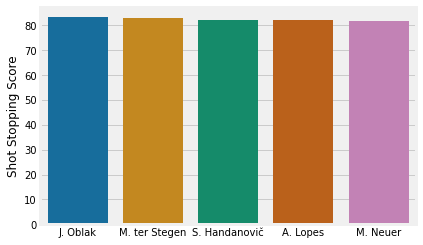

In [ ]:
plt.figure()
 
# Generate sequential data and plot
sd = df.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(sd['short_name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Sweeping Score')

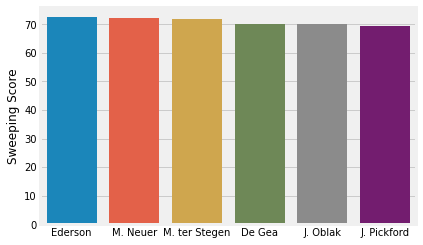

In [ ]:
plt.figure()
sd = df.sort_values('gk_Sweeper', ascending=False)[:6]
x2 = np.array(list(sd['short_name']))
y2 = np.array(list(sd['gk_Sweeper']))
sns.barplot(x2, y2)
plt.ylabel("Sweeping Score")

In [ ]:
#Based on the two parameters we used, we can conclude that M.ter Stegen would be the best choice goalkeeper

In [ ]:
#Finding The Best Defenders
df['df_centre_backs'] = ( d*df.movement_reactions + c*df.mentality_interceptions + d*df.defending_sliding_tackle + d*df.defending_standing_tackle + b*df.mentality_vision+ b*df.mentality_composure + b*df.attacking_crossing +a*df.attacking_short_passing + b*df.skill_long_passing+ c*df.movement_acceleration + b*df.pace
+ d*df.power_stamina + d*df.power_jumping + d*df.attacking_heading_accuracy + b*df.power_long_shots + d*df.defending_marking + c*df.mentality_aggression)/(6*b + 3*c + 7*d)
df['df_wb_Wing_Backs'] = (b*df.skill_ball_control + a*df.dribbling + a*df.defending_marking + d*df.defending_sliding_tackle + d*df.defending_standing_tackle + a*df.attacking_volleys + c*df.mentality_vision + c*df.attacking_crossing + b*df.attacking_short_passing + c*df.skill_long_passing + d*df.movement_acceleration +d*df.pace + c*df.power_stamina + a*df.attacking_finishing)/(4*a + 2*b + 4*c + 4*d)
#Based on the above parameters, we’ll be predicting 4 best defenders: 2 Centre backs and 2 wing backs.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'LCB Score')

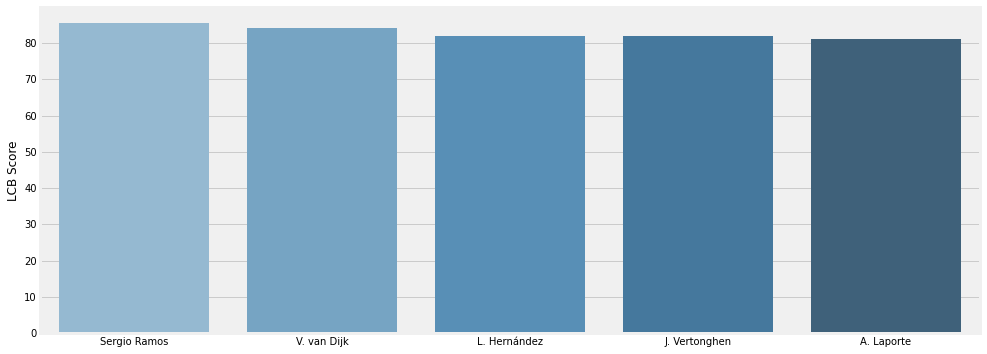

In [ ]:
plt.figure(figsize=(15,6))
sd = df[(df['team_position'or 'player_positions'] == 'LCB')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['short_name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LCB Score")


In [ ]:
#Based on the left centre back characteristics, it can be inferred that Sergio Ramos is the Best Left Central Defender.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'RCB Score')

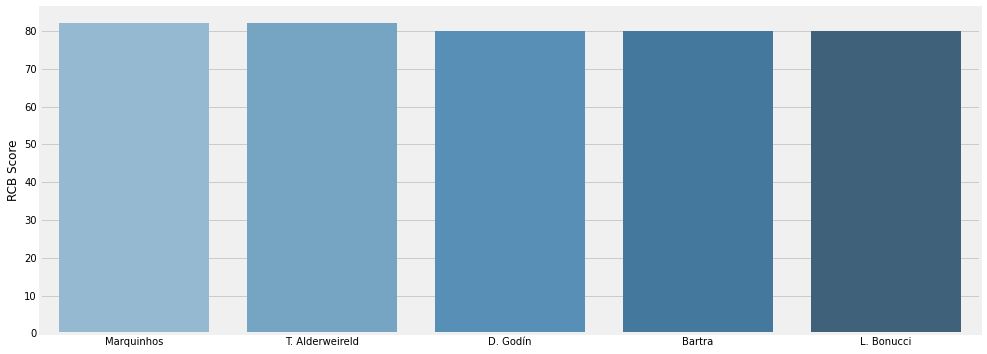

In [ ]:
plt.figure(figsize=(15,6))
 
sd = df[(df['team_position'or 'player_positions'] ==  'RCB')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['short_name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("RCB Score")

In [ ]:
#Based on the right centre back characteristics, it can be inferred that Marquinhos is the Best Right Central Defender. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Left Back Score')

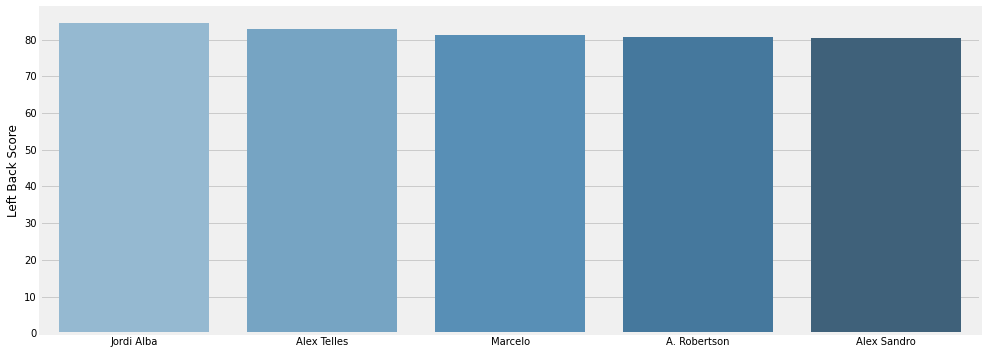

In [ ]:
plt.figure(figsize=(15,6))
 
sd = df[(df['team_position'or 'player_positions'] == 'LWB') | (df['team_position'or 'player_positions'] == 'LB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x4 = np.array(list(sd['short_name']))
y4 = np.array(list(sd['df_wb_Wing_Backs']))
sns.barplot(x4, y4, palette=sns.color_palette("Blues_d"))
plt.ylabel("Left Back Score")

In [ ]:
#Based on the left wing back characteristics, it can be inferred that jordi alba is the Best Left wing back. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Right Back Score')

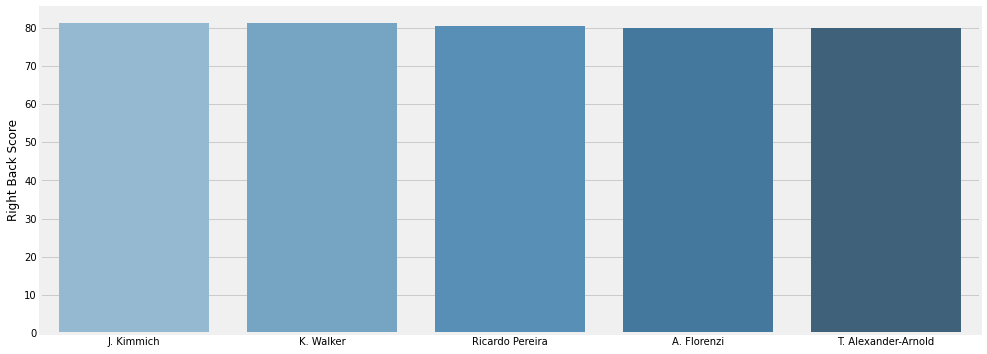

In [ ]:
plt.figure(figsize=(15,6))
sd = df[(df['team_position'or 'player_positions'] == 'RWB') | (df['team_position'or 'player_positions'] == 'RB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x5 = np.array(list(sd['short_name']))
y5 = np.array(list(sd['df_wb_Wing_Backs']))
sns.barplot(x5, y5, palette=sns.color_palette("Blues_d"))
plt.ylabel("Right Back Score")

In [ ]:
#Based on the right wing back characteristics, it can be inferred that J.kimmich is the Best Right wing back. 

In [ ]:
#Finding The Best Mid-Fielders
#As per my game formation 4-3-3, we have to choose 3 midfielders. In order to find these,we’ll be analyzing the data for the below mentioned parameters:
#Playmaker: A playmaker is someone who will move the ball to the attacking 3rd from defence or midfield.
#Beast:A beast is a typical box-to-box player with loads of energy and who can boss the midfield.
#Controller:A controller is the person who is orchestrating your midfield engine by either sitting back or going forward based on dynamic needs.

In [ ]:
df['mf_playmaker'] = (d*df.skill_ball_control+ d*df.dribbling + a*df.attacking_volleys + d*df.movement_reactions + d*df.mentality_vision + c*df.mentality_positioning + c*df.attacking_crossing + d*df.attacking_short_passing + c*df.skill_long_passing + c*df.skill_curve + b*df.power_long_shots + c*df.skill_fk_accuracy)/(1*a + 1*b + 4*c + 4*d)
df['mf_beast'] = (d*df.movement_agility + c*df.movement_balance + b*df.power_jumping + c*df.power_strength + d*df.power_stamina + a*df.pace + c*df.movement_acceleration + d*df.attacking_short_passing + c*df.mentality_aggression+ d*df.movement_reactions + b*df.attacking_volleys+ b*df.defending_standing_tackle + b*df.defending_sliding_tackle + b*df.mentality_interceptions)/(1*a + 5*b + 4*c + 4*d)
df['mf_controller'] = (b*df.weak_foot + d*df.skill_ball_control + a*df.dribbling + a*df.attacking_volleys + a*df.movement_reactions + c*df.mentality_vision + c*df.mentality_composure + d*df.attacking_short_passing + d*df.skill_long_passing)/(2*c + 3*d + 4*a)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'PlayMaker Score')

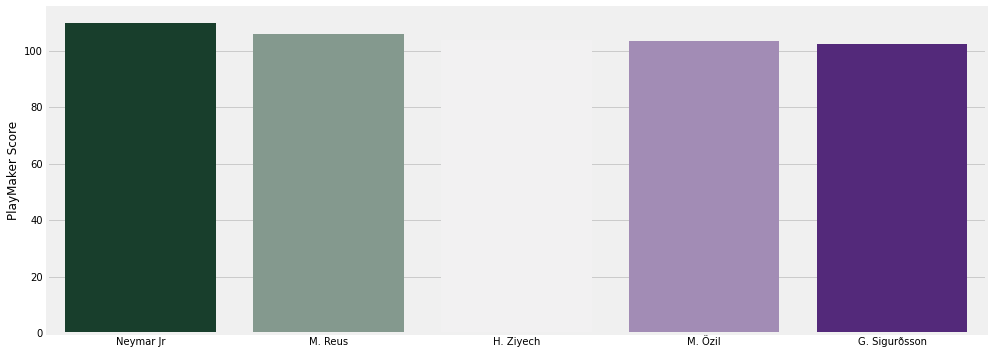

In [ ]:
plt.figure(figsize=(15,6))
 
ss = df[(df['team_position'or 'player_positions'] == 'CAM') | (df['team_position'or 'player_positions'] == 'LAM') | (df['team_position'or 'player_positions'] == 'RAM')].sort_values('mf_playmaker', ascending=False)[:5]
x3 = np.array(list(ss['short_name']))
y3 = np.array(list(ss['mf_playmaker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("PlayMaker Score")

In [ ]:
#As per the above analysis, we’ll pick Neymar Jr as the best Playmaker

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Beast Score')

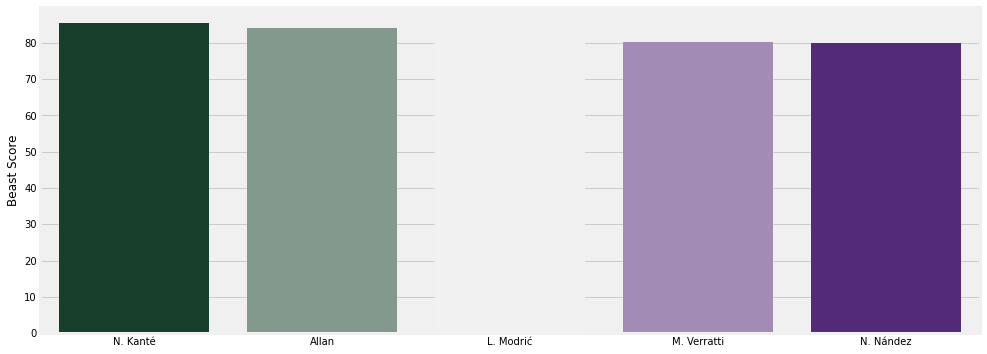

In [ ]:
plt.figure(figsize=(15,6))
 
ss = df[(df['team_position'or 'player_positions'] == 'RCM') | (df['team_position'or 'player_positions'] == 'RM')].sort_values('mf_beast', ascending=False)[:5]
x2 = np.array(list(ss['short_name']))
y2 = np.array(list(ss['mf_beast']))
sns.barplot(x2, y2, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Beast Score")

In [ ]:
#As per the above analysis, I’ll pick N’ Golo Kante as the best Beast/ Right Central Midfielder.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Controller Score')

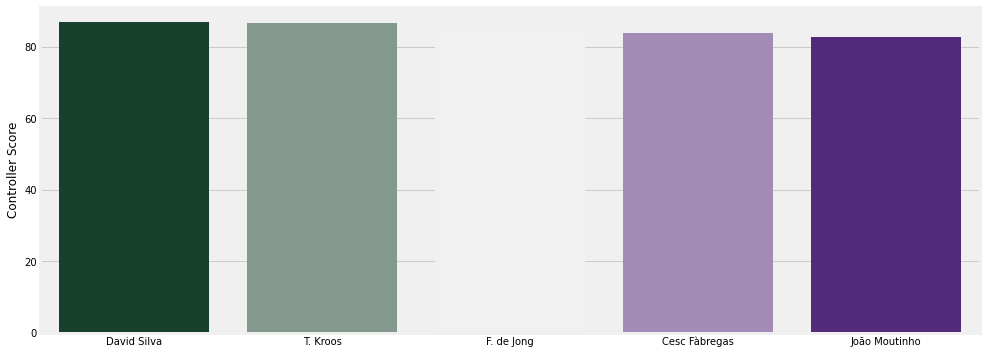

In [ ]:
plt.figure(figsize=(15,6))
 
# Generate some sequential data
ss = df[(df['team_position' or 'player_positions' ] == 'LCM') | (df['team_position' or 'player_positions'] == 'LM')].sort_values('mf_controller', ascending=False)[:5]
x1 = np.array(list(ss['short_name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1, y1, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Controller Score")

In [ ]:
#As per the above analysis, I’ll pick David silva as the best controller/ Left Central Midfielder.

In [ ]:
#Finding The Best Attackers
#In order to find the best attacker, I’ll be analyzing the below mentioned parameters:
#Attacking Left Wing: He is a player, attacking from the left flank.
#Attacking Right Wing: He is a player, attacking from the right flank.
#Striker: A player attacking from the center.


In [ ]:
df['att_left_wing'] = (c*df.weak_foot + c*df.skill_ball_control + c*df.dribbling + c*df.pace + d*df.movement_acceleration + b*df.mentality_vision + c*df.attacking_crossing + b*df.attacking_short_passing + b*df.skill_long_passing + b*df.mentality_aggression + b*df.movement_agility + a*df.skill_curve + c*df.power_long_shots + b*df.skill_fk_accuracy + d*df.attacking_finishing)/(a + 6*b + 6*c + 2*d)
df['att_right_wing'] = (c*df.weak_foot + c*df.skill_ball_control + c*df.dribbling + c*df.pace + d*df.movement_acceleration + b*df.mentality_vision + c*df.attacking_crossing + b*df.attacking_short_passing + b*df.skill_long_passing + b*df.mentality_aggression + b*df.movement_agility + a*df.skill_curve + c*df.power_long_shots + b*df.skill_fk_accuracy + d*df.attacking_finishing)/(a + 6*b + 6*c + 2*d)
df['att_striker'] = (b*df.weak_foot + b*df.skill_ball_control + a*df.mentality_vision + b*df.mentality_aggression + b*df.movement_agility + a*df.skill_curve + a*df.power_long_shots + d*df.movement_balance + d*df.attacking_finishing + d*df.attacking_heading_accuracy+ c*df.power_jumping + c*df.dribbling)/(3*a + 4*b + 2*c + 3*d)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Left Wing')

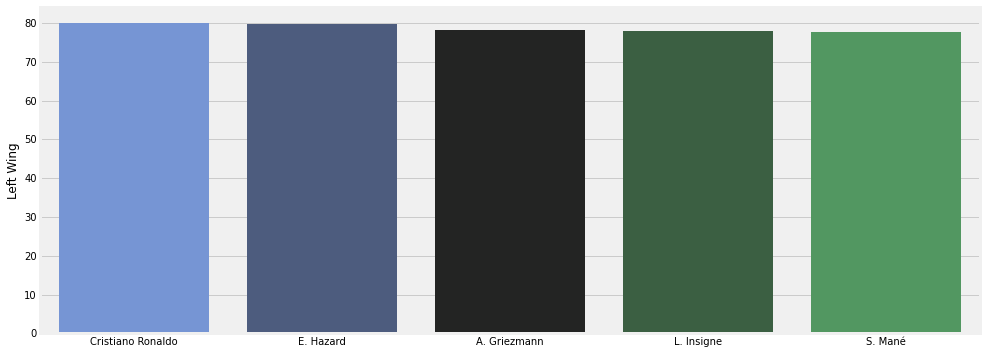

In [ ]:
plt.figure(figsize=(15,6))
 
ss = df[(df['team_position' or 'player_positions'] == 'LW') | (df['team_position' or 'player_positions'] == 'LM') | (df['team_position' or 'player_positions'] == 'LS')].sort_values('att_left_wing', ascending=False)[:5]
x1 = np.array(list(ss['short_name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Left Wing")

In [ ]:
#As per the above analysis, we’ll pick Ronaldo as the left wing attacker.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Right Wing')

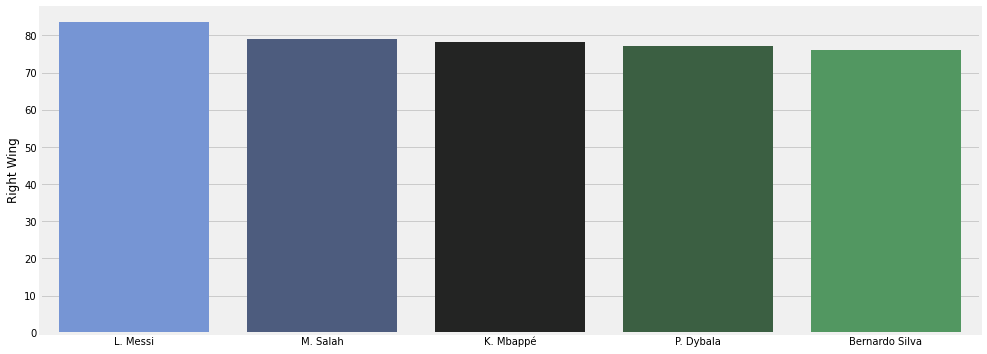

In [ ]:
plt.figure(figsize=(15,6))
 
ss = df[(df['team_position' or 'player_positions'] == 'RW') | (df['team_position' or 'player_positions'] == 'RM') | (df['team_position' or 'player_positions'] == 'RS')].sort_values('att_right_wing', ascending=False)[:5]
x2 = np.array(list(ss['short_name']))
y2 = np.array(list(ss['att_right_wing']))
sns.barplot(x2, y2, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Right Wing")

In [ ]:
#It’s quite evident from the above plot that L.Messi is the best right Wing Attacker

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Striker')

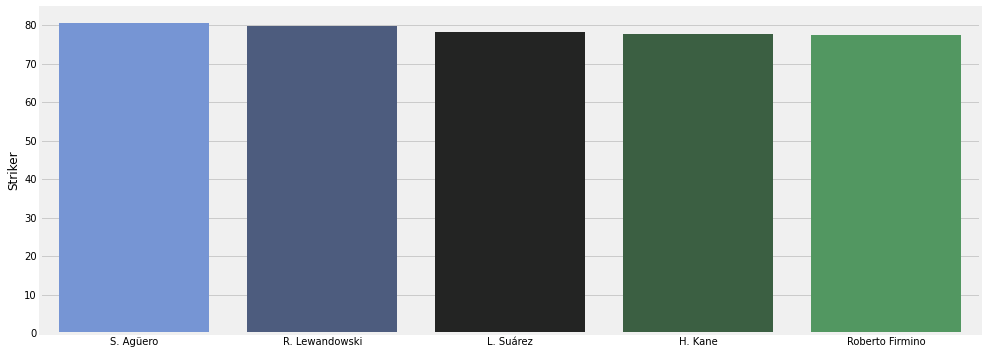

In [ ]:
plt.figure(figsize=(15,6))
ss = df[(df['team_position' or 'player_positions'] == 'ST') | (df['team_position' or 'player_positions'] == 'LS') | (df['team_position' or 'player_positions'] == 'RS') | (df['team_position' or 'player_positions'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x3 = np.array(list(ss['short_name']))
y3 = np.array(list(ss['att_striker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Striker")

In [ ]:
#As per the above analysis, the best striker would be S.Aguero.

In [ ]:
# the below image represents the Best Playing XI for  the 4-3-3(attack) lineup.